In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formulaaihackathon2022/weather.csv
/kaggle/input/formulaaihackathon2022/weather.json


In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings("ignore")

In [3]:
weather_dataset = pd.read_csv("/kaggle/input/formulaaihackathon2022/weather.csv")

In [4]:
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [5]:
weather_dataset.head(5).T

,0,1,2,3,4
M_PACKET_FORMAT,2021,2021,2021,2021,2021
M_GAME_MAJOR_VERSION,1,1,1,1,1
M_GAME_MINOR_VERSION,14,14,14,14,14
M_PACKET_VERSION,1,1,1,1,1
M_PACKET_ID,1,1,1,1,1
M_SESSION_UID,13002103581294143488.0,13002103581294143488.0,13002103581294143488.0,13002103581294143488.0,13002103581294143488.0
M_SESSION_TIME,2803.836,2803.836,2803.836,2803.836,2803.836
M_FRAME_IDENTIFIER,82458,82458,82458,82458,82458
M_PLAYER_CAR_INDEX,0,0,0,0,0
M_SECONDARY_PLAYER_CAR_INDEX,255,255,255,255,255


In [6]:
weather_dataset.isnull().sum()

M_PACKET_FORMAT                                         0
M_GAME_MAJOR_VERSION                                    0
M_GAME_MINOR_VERSION                                    0
M_PACKET_VERSION                                        0
M_PACKET_ID                                             0
M_SESSION_UID                                           0
M_SESSION_TIME                                          0
M_FRAME_IDENTIFIER                                      0
M_PLAYER_CAR_INDEX                                      0
M_SECONDARY_PLAYER_CAR_INDEX                            0
M_BRAKING_ASSIST                                        0
M_SESSION_LINK_IDENTIFIER                               0
M_PIT_RELEASE_ASSIST                                    0
TIMESTAMP                                               0
M_ZONE_START                                      2598054
M_ZONE_FLAG                                       2598054
M_PIT_STOP_WINDOW_IDEAL_LAP                             0
M_TRACK_TEMPER

In [7]:
weather_dataset.shape

(3572328, 59)

In [8]:
print('The percentage of missing values in Zone Start and Zone Stop is',weather_dataset['M_ZONE_START'].isnull().sum()/weather_dataset['M_SESSION_UID'].count().round(3))

print('The percentage of missing values in Weather and Track/Temperature is',weather_dataset['M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE'].isnull().sum()/weather_dataset['M_SESSION_UID'].count().round(3))

The percentage of missing values in Zone Start and Zone Stop is 0.7272719638286294
The percentage of missing values in Weather and Track/Temperature is 0.2727280361713706


In [9]:
# checking the count of unique session IDs
# https://github.com/oracle-devrel/formula-ai-2022-hackathon/blob/main/challenges/challenge1.md -- mentions that " You can explore the total 
# number of different sessions played bycounting the session_uid distinct values."

print('Number of unique race sessions in the dataset is',weather_dataset.M_SESSION_UID.nunique()) 

Number of unique race sessions in the dataset is 153


In [10]:
weather_dataset.duplicated().sum() # checking the duplicates

2057230

In [11]:
weather_dataset.drop_duplicates(inplace=True) # removing the duplicates

weather_dataset.shape

(1515098, 59)

In [12]:
# It is recommended to filter out rows that provide no value to the AI model. 
# This can occur if the number of forecast samples is 0 (num_weather_forecast_samples=0), 
# or if the session type is 0 (unknown session type, as seen in the WeatherForecastSample definition above). 
# This can be done doing an Exploratory Data Analysis.


weather_dataset['M_NUM_WEATHER_FORECAST_SAMPLES'].value_counts() #dropping all rows that have 0

48    553880
10    550298
0     203259
9     102598
3      63035
7      33080
27      7544
6       1404
Name: M_NUM_WEATHER_FORECAST_SAMPLES, dtype: int64

In [13]:
weather_dataset.drop(weather_dataset.loc[weather_dataset['M_NUM_WEATHER_FORECAST_SAMPLES']==0].index, inplace=True)

In [14]:
weather_dataset['M_SESSION_TYPE'].value_counts() # check for unknown values

1     553880
8     550298
10    198713
5       7544
9       1404
Name: M_SESSION_TYPE, dtype: int64

In [15]:
for column in weather_dataset.columns:
    print(column.upper(),': ',weather_dataset[column].nunique())
    print(weather_dataset[column].value_counts().sort_values())
    print('\n')

M_PACKET_FORMAT :  1
2021    1311839
Name: M_PACKET_FORMAT, dtype: int64


M_GAME_MAJOR_VERSION :  1
1    1311839
Name: M_GAME_MAJOR_VERSION, dtype: int64


M_GAME_MINOR_VERSION :  1
14    1311839
Name: M_GAME_MINOR_VERSION, dtype: int64


M_PACKET_VERSION :  1
1    1311839
Name: M_PACKET_VERSION, dtype: int64


M_PACKET_ID :  1
1    1311839
Name: M_PACKET_ID, dtype: int64


M_SESSION_UID :  130
1.802471e+19       112
5.131882e+18       134
4.579319e+18       168
1.442336e+19       168
1.009248e+19       174
                 ...  
7.388522e+18     41188
6.816529e+18     41944
1.707009e+19     77720
1.086282e+19    104637
9.335669e+17    432150
Name: M_SESSION_UID, Length: 130, dtype: int64


M_SESSION_TIME :  34035
91.555       15
110.240      15
123.338      15
112.249      15
121.312      15
           ... 
0.009       312
0.011       331
0.015       407
0.005       519
0.010      1138
Name: M_SESSION_TIME, Length: 34035, dtype: int64


M_FRAME_IDENTIFIER :  21586
2638      15
1664  

In [16]:
# Removing all columns with only one value

weather_dataset.drop(columns=['M_PACKET_FORMAT','GAMEHOST','M_PACKET_ID','M_PACKET_VERSION','M_GAME_MAJOR_VERSION','M_GAME_MINOR_VERSION'],inplace=True)

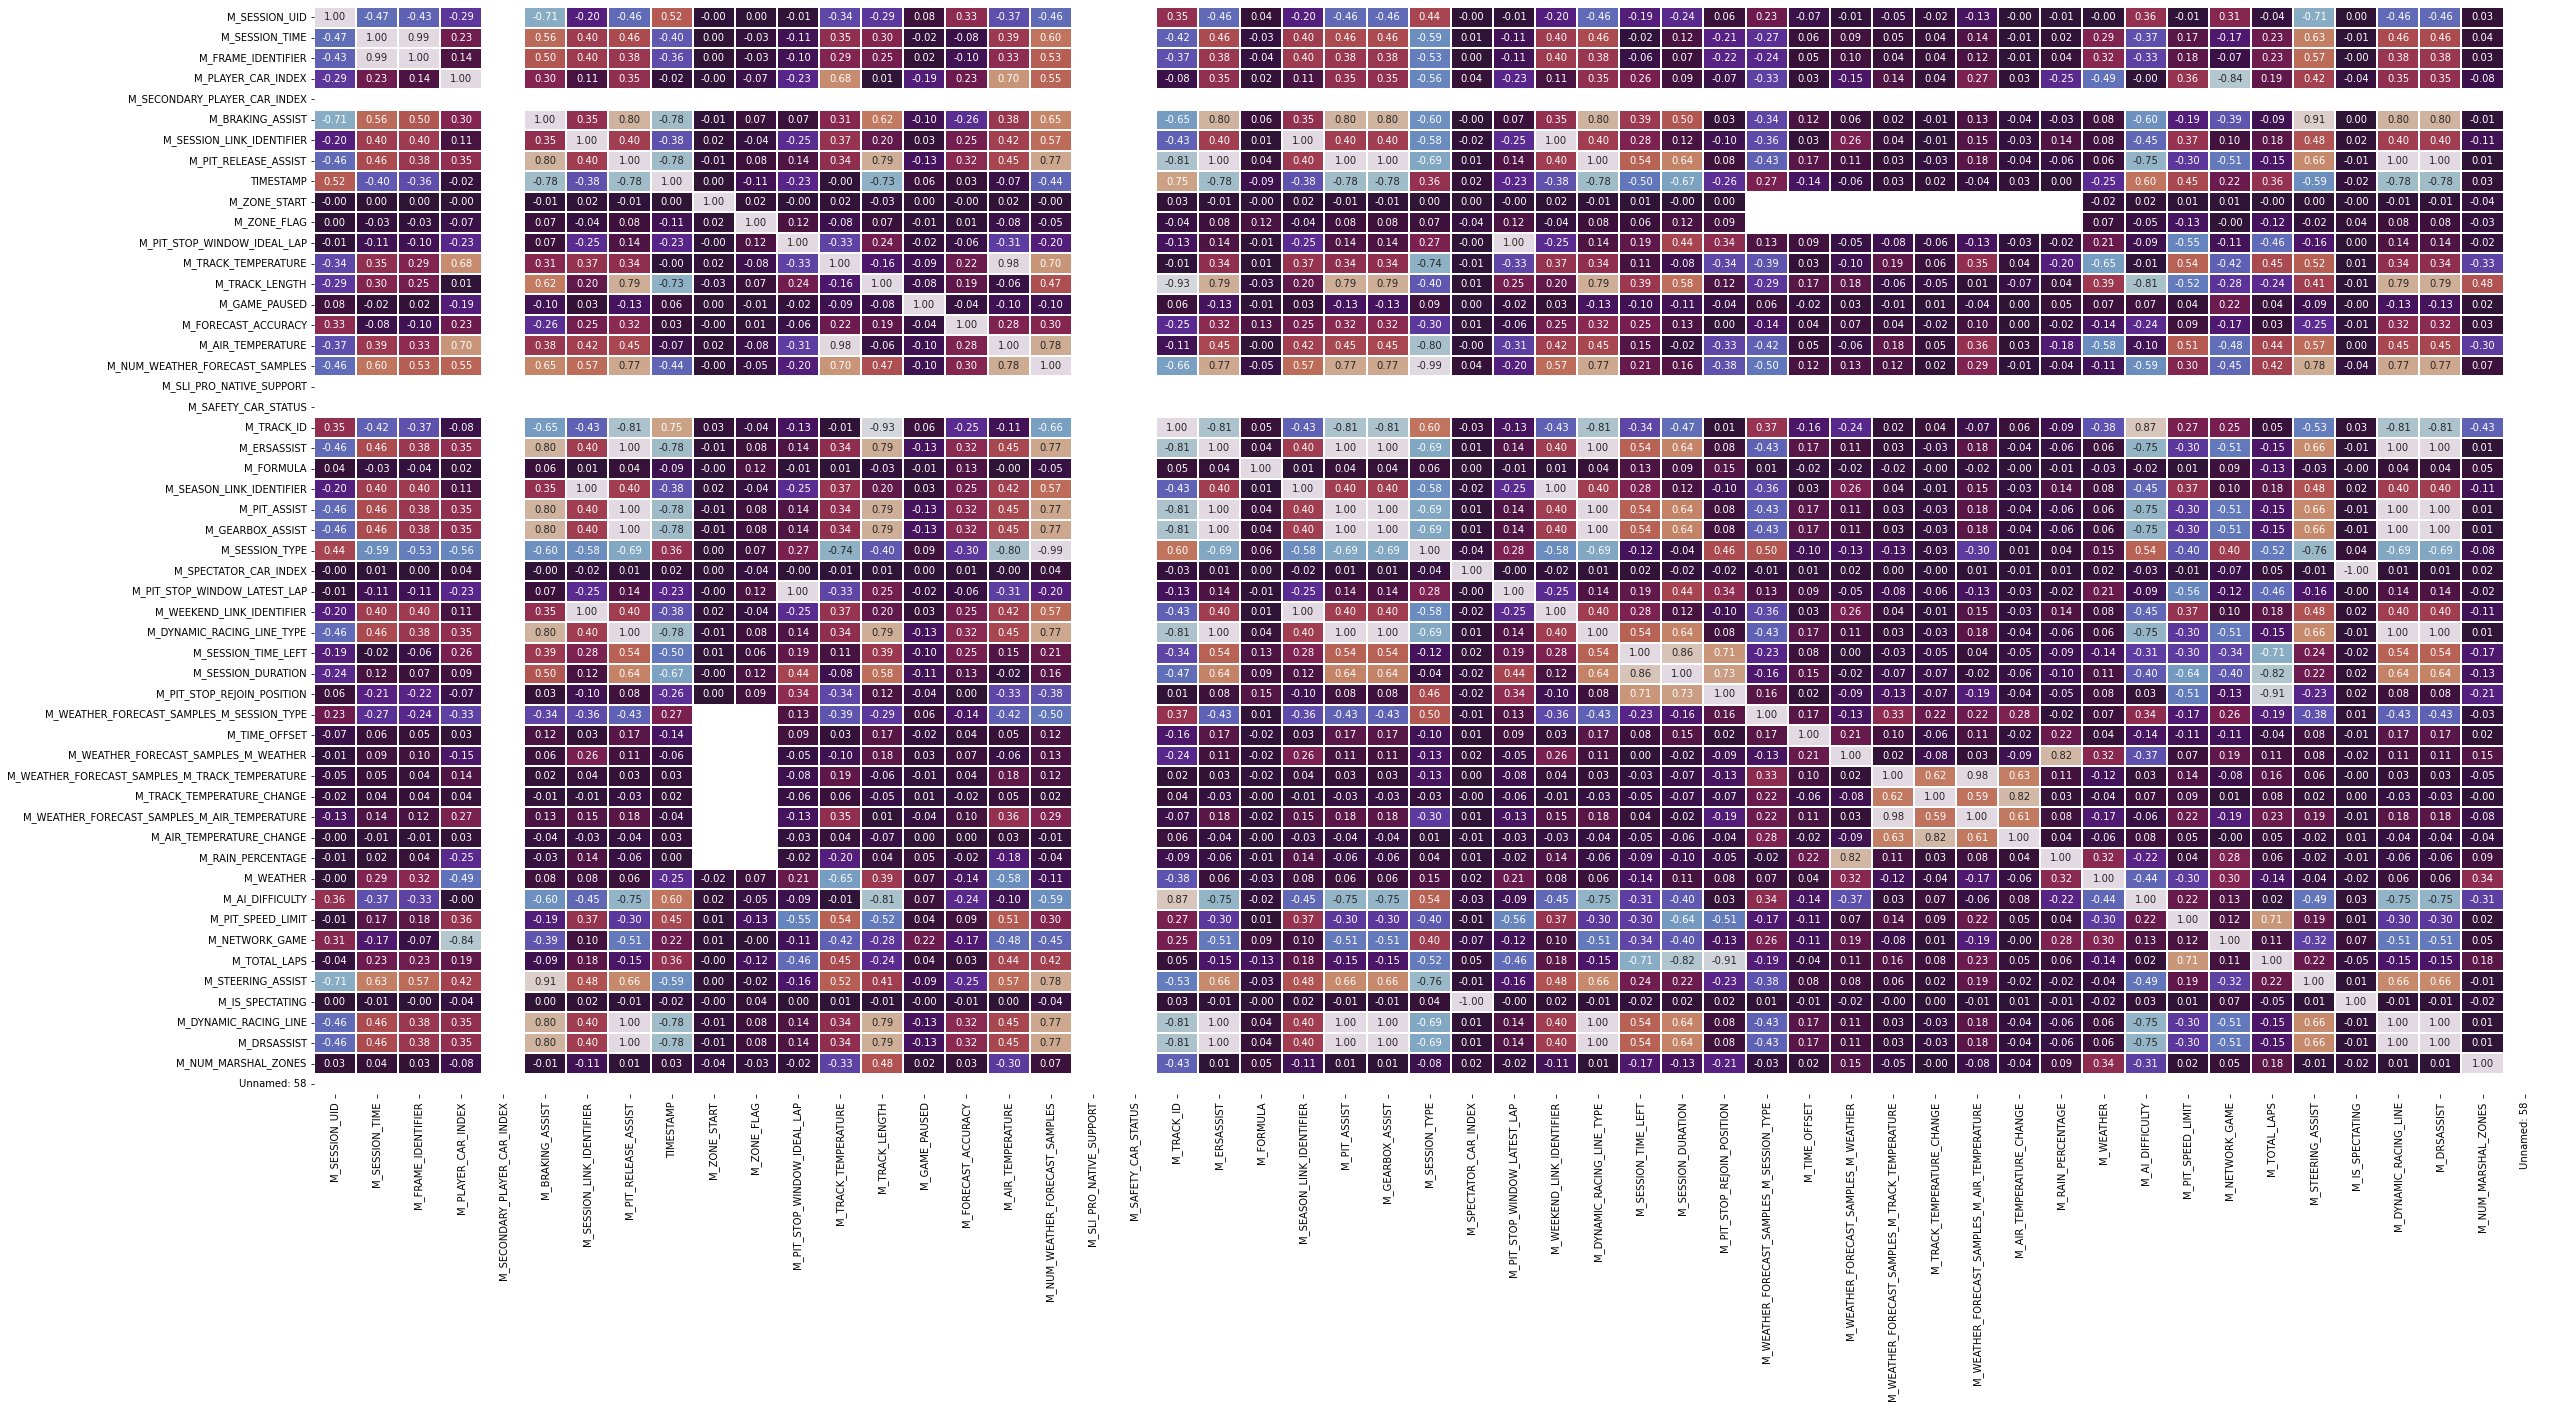

In [17]:
weather_corr_mat = weather_dataset.corr()

plt.figure(figsize=(40,20))
sns.heatmap(weather_corr_mat,annot=True, fmt='.2f',cmap='twilight', annot_kws={"fontsize":10}, linewidths=.25, cbar=False)
plt.show()

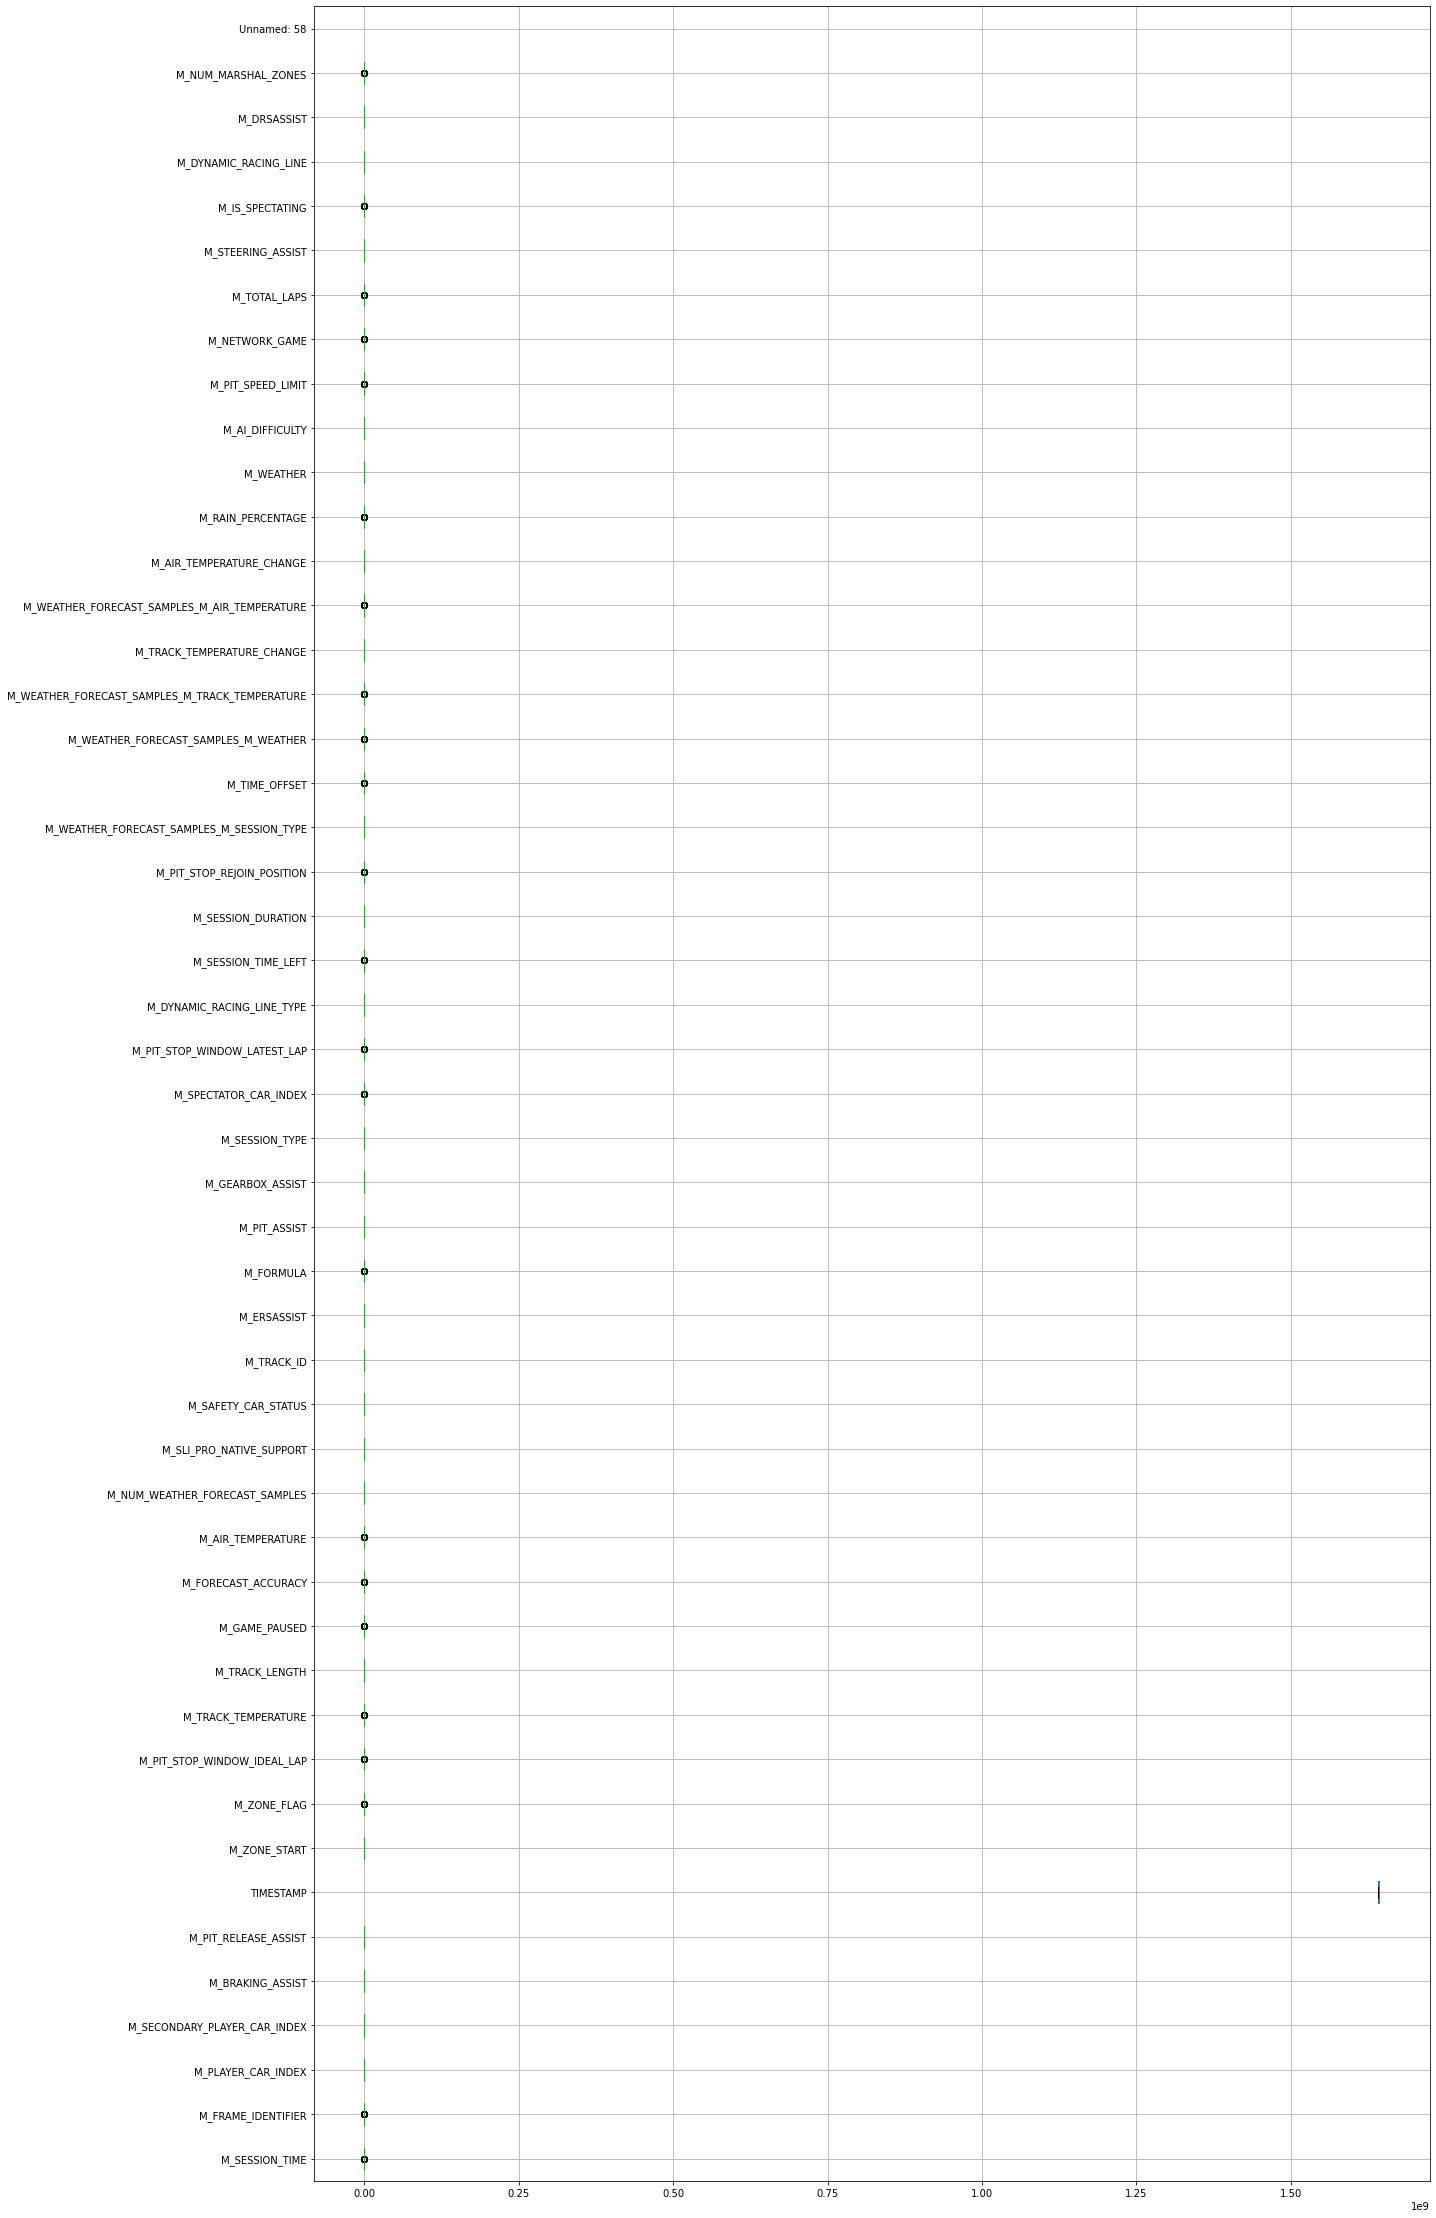

In [18]:
plt.figure(figsize=(20,40))
weather_without_uuid = weather_dataset.drop(columns=['M_SESSION_UID','M_SEASON_LINK_IDENTIFIER','M_SESSION_LINK_IDENTIFIER','M_WEEKEND_LINK_IDENTIFIER']);
weather_without_uuid.boxplot(vert=False);

In [ ]:
imputer = KNNImputer(n_neighbors=3)
weather_dataset = imputer.fit_transform(weather_dataset)

# Running two models for predicting two variables - weather and rain percentage probability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1, stratify=y)

ANN_model = MLPRegressor()
ANN_model.fit(x_train_scaled, y_train)

In [20]:
X_weather = weather_dataset.drop('M_WEATHER', axis=1)
y_weather = weather_dataset.pop('M_WEATHER')

X_train_m1, X_test_m1, y_train_m1, y_test_m1w= train_test_split(X_weather, y_weather, test_size=0.3 , random_state=1)

KeyError: "['M_WEATHER'] not found in axis"

In [ ]:
weather_dataset.columns